In [1]:
!pip install samplerate

     |████████████████████████████████| 4.0 MB 4.4 MB/s            


In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment
from scipy.io.wavfile import write
from pydub import AudioSegment, effects 
import glob
import os
import pathlib
from os.path import isdir, join
import numpy as np
from samplerate import resample
import matplotlib.pyplot as plt
import librosa.display
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import collections
import math
import random
from six.moves import urllib
import io
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output, Image, display, HTML
import tensorflow as tf
import tensorflow_hub as hub
import sklearn.metrics as sk_metrics
import time
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras import backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from sklearn.metrics import confusion_matrix, classification_report

# Reading the data

In [3]:
## set train, validation, and test paths
train_path = '../input/dataset-speech/Speech_Dataset/train'
validation_path = '../input/dataset-speech/Speech_Dataset/val'
test_path = '../input/dataset-speech/Speech_Dataset/test'

In [4]:
dirs = [f for f in os.listdir(train_path) if isdir(join(train_path, f))]
print(dirs)

['no', 'yes']


## Display 'Yes' word

In [5]:
audio_data = '../input/dataset-speech/Speech_Dataset/train/yes/0137b3f4_nohash_4.wav'    
x , sr = librosa.load(audio_data, sr=16000)

ipd.Audio(audio_data)

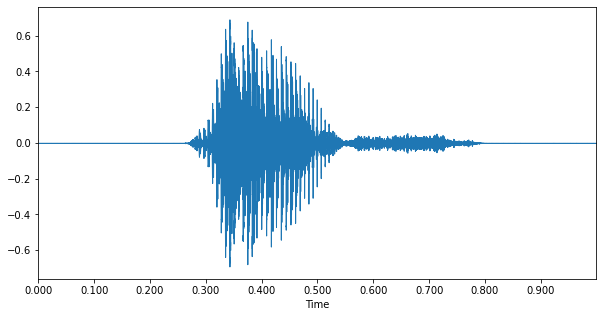

In [6]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

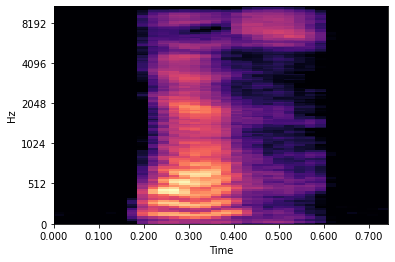

In [7]:
ps = librosa.feature.melspectrogram(x, sr=sr)
ps_db= librosa.power_to_db(ps, ref=np.max)

librosa.display.specshow(ps_db, x_axis='time', y_axis='mel')

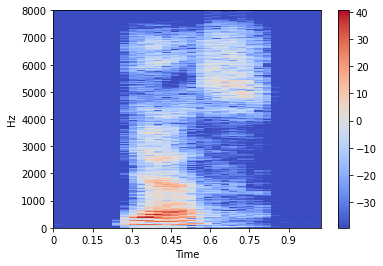

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

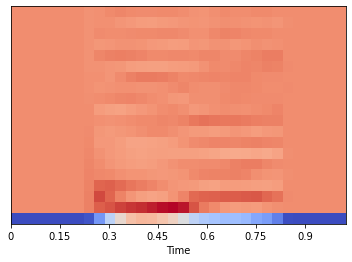

In [9]:
mfccs = librosa.feature.mfcc(x, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Display 'No' word

In [10]:
audio_no = '../input/dataset-speech/Speech_Dataset/train/no/0137b3f4_nohash_2.wav'    
x2 , sr2 = librosa.load(audio_no, sr=16000)
print(sr2)
ipd.Audio(audio_no)

16000


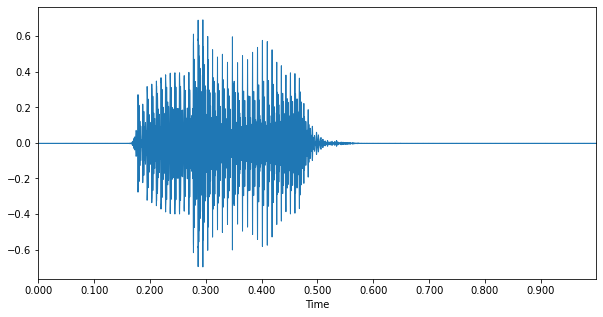

In [11]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x2, sr=sr2)
plt.show()

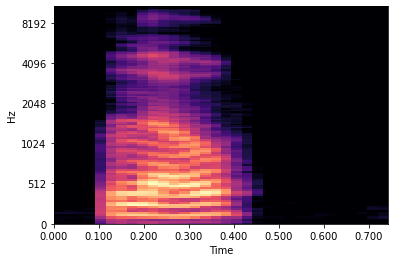

In [12]:
ps = librosa.feature.melspectrogram(x2, sr=sr2)
ps_db= librosa.power_to_db(ps, ref=np.max)

librosa.display.specshow(ps_db, x_axis='time', y_axis='mel')

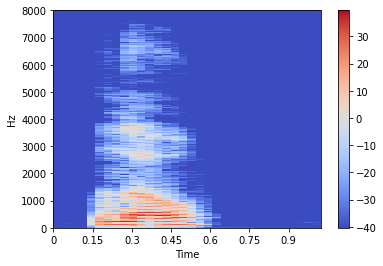

In [13]:
X2 = librosa.stft(x2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
librosa.display.specshow(Xdb2, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar()

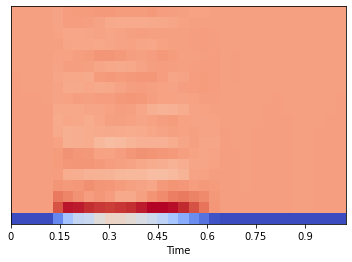

In [14]:
mfccs2 = librosa.feature.mfcc(x2, sr=sr2)
librosa.display.specshow(mfccs2, sr=sr2, x_axis='time')

# Convert all audio files to spectrograms

In [15]:
# cmap = plt.get_cmap('inferno')
# plt.figure(figsize=(8,8))
# classes = ['yes', 'no']
# for i in classes:
#     pathlib.Path(f'train/{i}').mkdir(parents=True, exist_ok=True)
#     for filename in os.listdir(f'../input/dataset-speech/Speech_Dataset/train/{i}'):
#         audio = f'../input/dataset-speech/Speech_Dataset/train/{i}/{filename}'
#         y, sr = librosa.load(audio, sr=16000)
#         ps= librosa.feature.melspectrogram(y, sr=sr)
#         ps_db= librosa.power_to_db(ps, ref=np.max)
#         librosa.display.specshow(ps_db)
#         #plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
#         plt.axis('off')
#         plt.savefig(f'train/{i}/{filename[:-3].replace(".", "")}.png')
#         #plt.show()
#         plt.clf()

In [16]:
# cmap = plt.get_cmap('inferno')
# plt.figure(figsize=(8,8))
# classes = ['yes', 'no']
# for i in classes:
#     pathlib.Path(f'test/{i}').mkdir(parents=True, exist_ok=True)
#     for filename in os.listdir(f'../input/dataset-speech/Speech_Dataset/test/{i}'):
#         audio = f'../input/dataset-speech/Speech_Dataset/test/{i}/{filename}'
#         y, sr = librosa.load(audio, sr=16000)
#         ps= librosa.feature.melspectrogram(y, sr=sr)
#         ps_db= librosa.power_to_db(ps, ref=np.max)
#         librosa.display.specshow(ps_db)
#         #plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
#         plt.axis('off')
#         plt.savefig(f'test/{i}/{filename[:-3].replace(".", "")}.png')
#         #plt.show()
#         plt.clf()

In [17]:
# cmap = plt.get_cmap('inferno')
# plt.figure(figsize=(8,8))
# classes = ['yes', 'no']
# for i in classes:
#     pathlib.Path(f'val/{i}').mkdir(parents=True, exist_ok=True)
#     for filename in os.listdir(f'../input/dataset-speech/Speech_Dataset/val/{i}'):
#         audio = f'../input/dataset-speech/Speech_Dataset/val/{i}/{filename}'
#         y, sr = librosa.load(audio, sr=16000)
#         ps= librosa.feature.melspectrogram(y, sr=sr)
#         ps_db= librosa.power_to_db(ps, ref=np.max)
#         librosa.display.specshow(ps_db)
#         #plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
#         plt.axis('off')
#         plt.savefig(f'val/{i}/{filename[:-3].replace(".", "")}.png')
#         #plt.show()
#         plt.clf()

# Model training

In [18]:
## set train, validation, and test paths
train_path = '../input/spectrograms/train'
validation_path = '../input/spectrograms/val'
test_path = '../input/spectrograms/test'

In [19]:
train_batches  = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path, target_size=(224, 224), batch_size = 50, classes=['yes', 'no'])

validation_batches  = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_path, target_size=(224, 224), batch_size = 10, classes=['yes', 'no'])

test_batches  = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, target_size=(224, 224), batch_size = 10,classes=['yes', 'no'])

Found 3801 images belonging to 2 classes.
Found 474 images belonging to 2 classes.
Found 477 images belonging to 2 classes.


In [20]:
## Augmentation datagenerator
train_datagen = ImageDataGenerator(rescale=1./255)

## train generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=25,
        class_mode='categorical')

## test generator, required for prediction
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=1,
        shuffle = False,
        class_mode='categorical')

## validation generator
val_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

Found 3801 images belonging to 2 classes.
Found 477 images belonging to 2 classes.
Found 474 images belonging to 2 classes.


In [21]:
## set steps per epoch for train
train_filenames = train_batches.filenames
steps_train = len(train_filenames)/train_batches.batch_size

## set steps per epoch for validation
val_filenames = validation_batches.filenames
steps_val = len(val_filenames)/validation_batches.batch_size

## test
filenames_test = test_batches.filenames
nb_samples_test= len(filenames_test)
true_classes = test_batches.classes
target_names = ['yes', 'no']

In [22]:
base_model_vgg19 = VGG19(weights = 'imagenet',include_top=False, input_shape=(224, 224, 3))  #not include the 3 fully-connected layers at the top of the network.
base_model_vgg19.summary()

base_model_vgg19.trainable = False

2022-01-18 10:36:01.951223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 10:36:02.080030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 10:36:02.080771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-18 10:36:02.081902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [23]:
translearn_vgg19 = Sequential()

# Add vgg19 layer by layer to our model and freeze all
for layer in base_model_vgg19.layers:
    translearn_vgg19.add(layer)
    
# train last two layers of vgg19
for layer in translearn_vgg19.layers[-2:]:
    layer.trainable=True
    
translearn_vgg19.add(GlobalAveragePooling2D())
translearn_vgg19.add(Dropout(0.2))
translearn_vgg19.add(Dense(2, activation='softmax'))
translearn_vgg19.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [24]:
## compile model
translearn_vgg19.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

# Callbacks
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience= 5, verbose=1)
mc = ModelCheckpoint("./vgg19_best_packages.h5", monitor='val_accuracy', verbose=1, save_best_only=True)
cb=[es, mc]

## fit model
model_vgg19 = translearn_vgg19.fit(train_generator,
                                   steps_per_epoch=steps_train,
                                   epochs=20,
                                   validation_data=val_generator,
                                   validation_steps=steps_val,
                                   verbose=1,
                                   callbacks=cb)

2022-01-18 10:36:05.663315: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-01-18 10:36:07.348396: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


76/76 [==============================] - 34s 322ms/step - loss: 0.4795 - acc: 0.7652 - val_loss: 0.3000 - val_acc: 0.8882
Epoch 2/20
76/76 [==============================] - 20s 257ms/step - loss: 0.2360 - acc: 0.9106 - val_loss: 0.1822 - val_acc: 0.9388
Epoch 3/20
76/76 [==============================] - 19s 249ms/step - loss: 0.1647 - acc: 0.9411 - val_loss: 0.1388 - val_acc: 0.9409
Epoch 4/20
76/76 [==============================] - 18s 241ms/step - loss: 0.1560 - acc: 0.9413 - val_loss: 0.1174 - val_acc: 0.9578
Epoch 5/20
76/76 [==============================] - 19s 248ms/step - loss: 0.1120 - acc: 0.9564 - val_loss: 0.1864 - val_acc: 0.9283
Epoch 6/20
76/76 [==============================] - 18s 234ms/step - loss: 0.1049 - acc: 0.9574 - val_loss: 0.0887 - val_acc: 0.9620
Epoch 7/20
76/76 [==============================] - 17s 229ms/step - loss: 0.1095 - acc: 0.9553 - val_loss: 0.0836 - val_acc: 0.9705
Epoch 8/20
76/76 [==============================] - 18s 233ms/step - loss: 0.086

In [25]:
translearn_vgg19.save('speech_vgg19.h5')

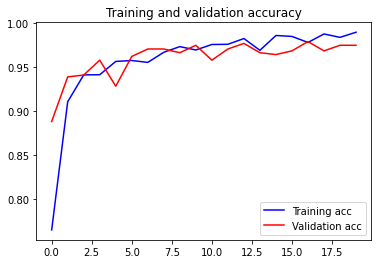

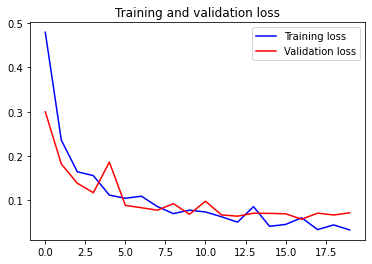

In [26]:
acc = model_vgg19.history['acc']
val_acc = model_vgg19.history['val_acc']
loss = model_vgg19.history['loss']
val_loss = model_vgg19.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict

In [27]:
pred= translearn_vgg19.predict(test_generator, steps = nb_samples_test, verbose=2)
pred = pred.argmax(axis=1)

477/477 - 5s


**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

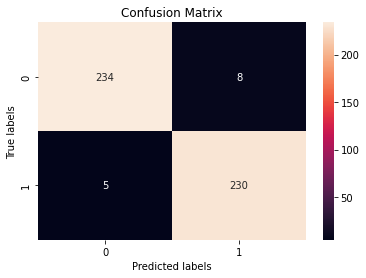

In [28]:
cm = confusion_matrix(pred, true_classes)
f, ax= plt.subplots(1,1)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels(['yes', 'no']) 
# ax.yaxis.set_ticklabels(['yes', 'no'])

**Classification Report**

In [29]:
print(classification_report(true_classes, pred, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.97      0.98      0.97       239
          no       0.98      0.97      0.97       238

    accuracy                           0.97       477
   macro avg       0.97      0.97      0.97       477
weighted avg       0.97      0.97      0.97       477

